# Capstone Webscrapping using BeautifulSoup

In this Capstone project, we will do medium level web scraping using beautifulsoup. Web Scraping is a special method used to collect data from the internet. In this project we will retrieve data from exchange-rates.org, where this website provides exchange rates for all currencies in the world. On this occasion we will take US Dollars (USD) to Indonesian Rupiah (IDR) Exchange Rate History. To do so, we'll just be using some of the default libraries from python and BeautifulSoup. To do web scraping, we need a little knowledge of html. It can be read in the beautifulsoup collection.

## background

In this project, we try to retrieve data from the exchange-rates.org website. This website contains all exchange rates for all currencies in the world, one of which is the currency of Indonesia. Here we will do scraping using beautifulsoup to retrieve US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History data for the last six months. The purpose of this scraping is to perform additional analysis on changes in exchange rates that occur between the rupiah and the dollar. To analyze it we need to collect this data because we do not have access to the data.
From the data on the website, we will search for and collect ''daily prices'' and ''dates'', then from these data will be saved to a data frame which will then plot the movement of the USD to IDR exchange rate.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [324]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [325]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [326]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [327]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our get_url object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character.

## Finding the right key to scrap the data & Extracting the right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

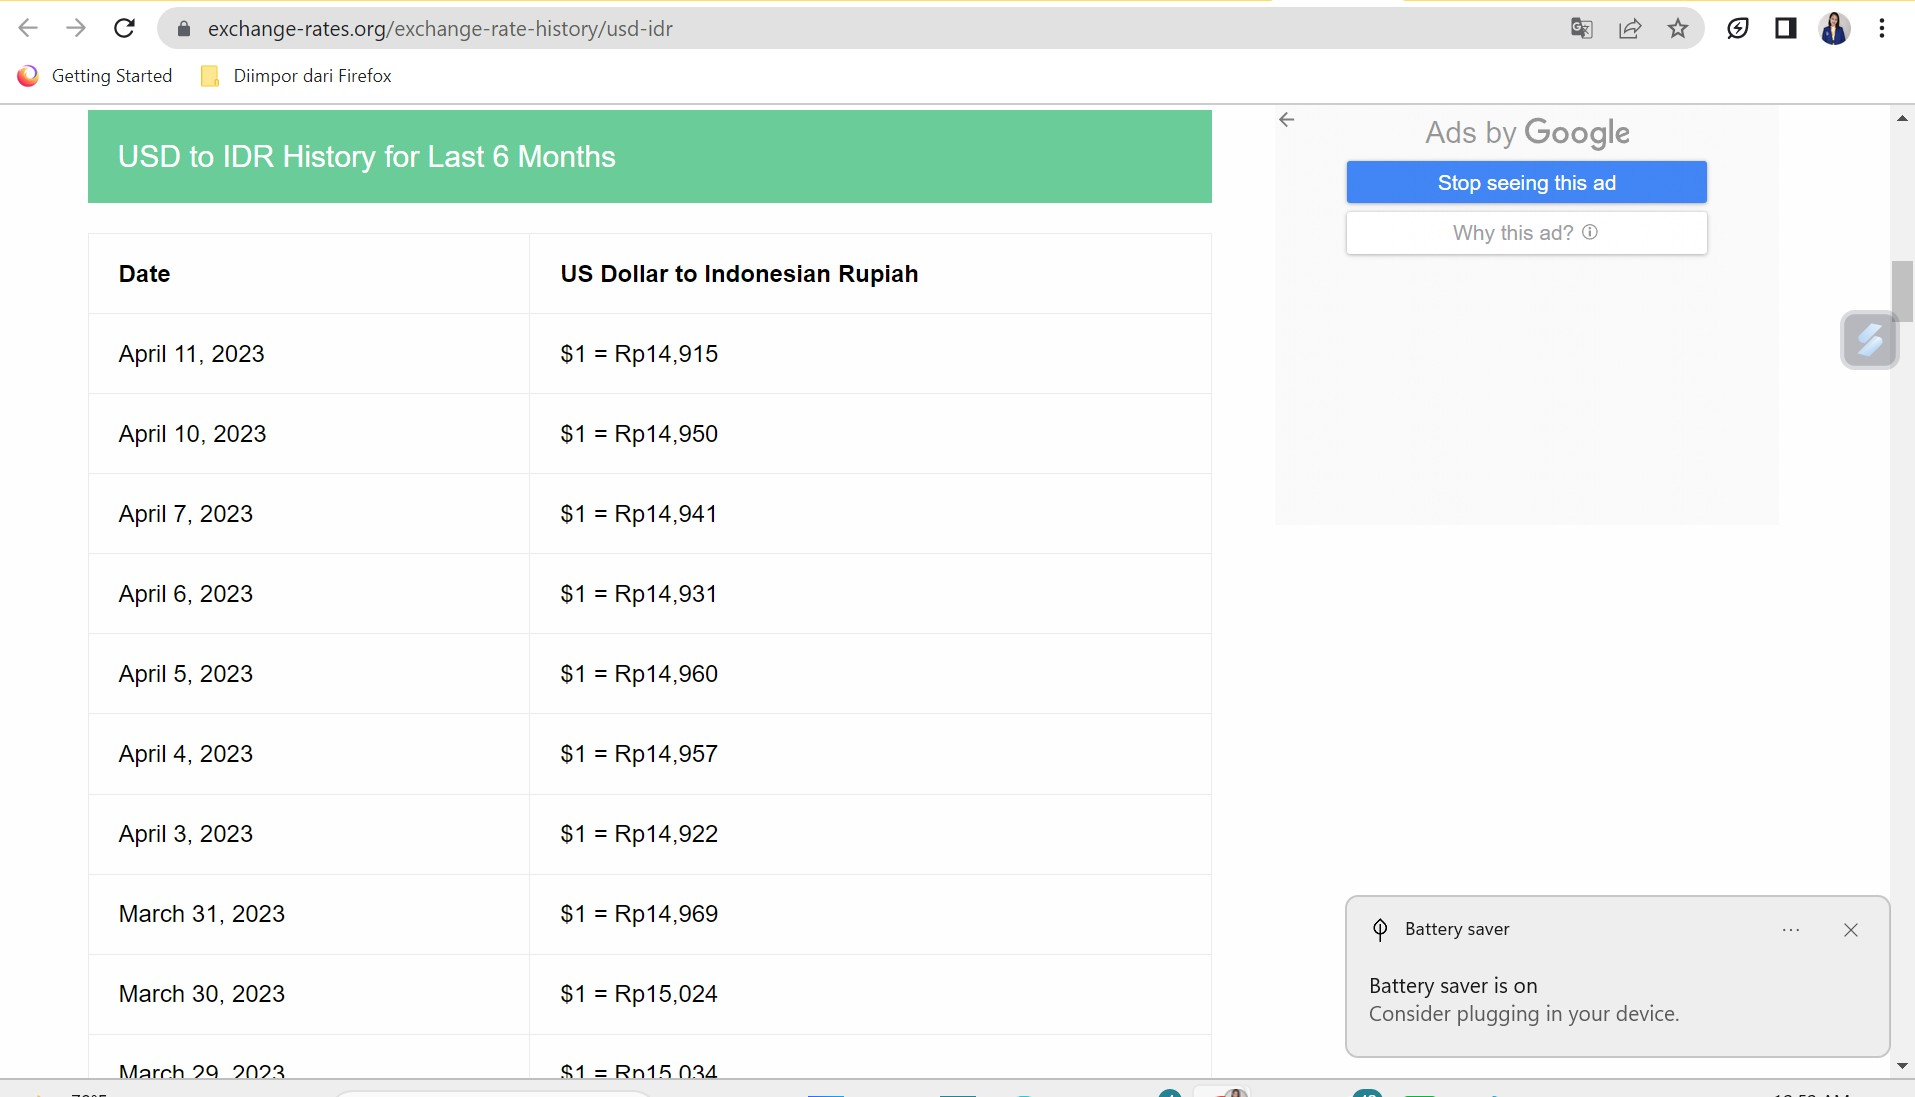

The information that we need are the Date (daily) and the Exchange rates USD to IDR, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

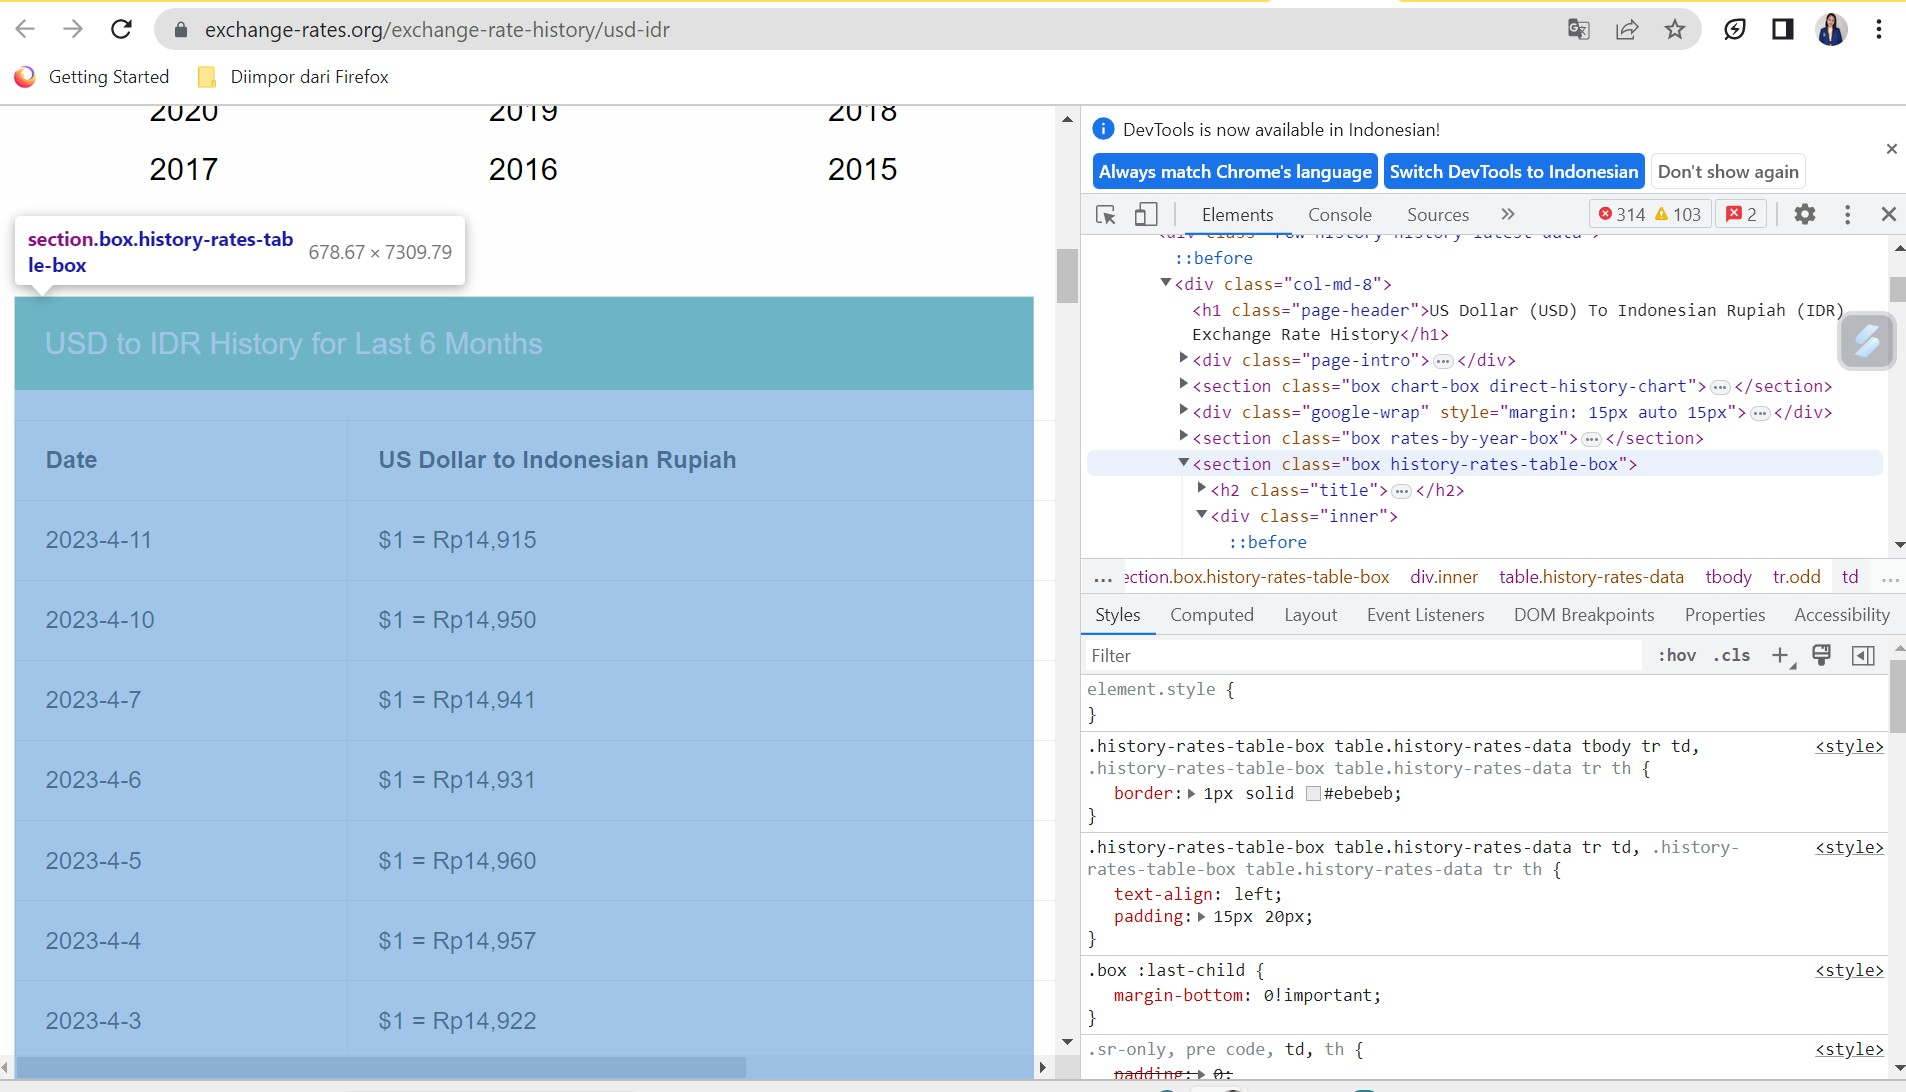

From inspect element we know that we need to find the line table with class 'box history-rates-table-box'. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

In [328]:
table = soup.find('section', attrs={'class':"box history-rates-table-box"})
print(table.prettify()[:500])

<section class="box history-rates-table-box">
 <h2 class="title">
  <span>
   USD to IDR History for Last 6 Months
  </span>
 </h2>
 <div class="inner">
  <table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
   <thead>
    <tr>
     <th class="ltr-bidi-fix">
      Date
     </th>
     <th class="ltr-bidi-fix">
      US Dollar to Indonesian Rupiah
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      <a class="w" href="/exchange-rate-history/usd-idr-2023-04


We can see that we got all the content we need as shown in the lines we just extracted. The definition of 'div' can be interpreted as a division or the inside of an HTML document. In general, divs use class or id attributes to make them easier to organize, all types of content can be placed in the 'div' tag.

To help get the part of the html code we need, we can use the find() function. The function of attrs is to differentiate html as most of it is contained within a div.

Now we have to get 2 pieces of information, namely the date for the last 6 months and the USD to IDR exchange rates. Based on the code above, we can read and understand it so we can conclude that the date information is contained in the code 'a', attrs={'class':'n' or 'class'='w'}, while the exchange rates are contained in the code 'span', attrs={'class':'n' or 'class'='w'}.

For example I'll try to extract the first 5 data of date information and exchange rates from the html. You can use slicer to help you.

In [329]:
table.find_all("a", attrs={'class':"n"})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">2023-4-11</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-10">2023-4-10</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">2023-4-7</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-06">2023-4-6</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-05">2023-4-5</a>]

In [330]:
table.find_all("span", attrs={'class':"w"})[:5]

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,950</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,941</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,931</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,960</span></span>]

To get only text information, you can add .text. Remember you only need to get one piece of information before using .text otherwise it will return an error. Here's an example of how you would use .text.

In [331]:
table.find_all("span", attrs={'class':"w"})[0].text

'$1 = Rp14,915'

# Extracting the Information

For now the beatifulsoup part is over. The next step is to do some programming to extract all the data automatically. A quick way to extract all the data is to use a loop. Before that we have to check the row length of the data, as well as check how long our data helps our looping process. Since find_all will always return data in list format, we'll use len() to check how long our list is.

In [332]:
row= table.find_all('a', attrs={'class':"n"})
row_length = len(row)
row_length

129

In [333]:
row= table.find_all('span', attrs={'class':"n"})
row_length1 = len(row)
row_length1

129

Alright, now we know the length of our data. The next step is the iterative process.
Here what the looping do to scrap the information:

1. First we need to establish a placeholder to receive the information that we scrap.
2. We named our placeholder temp and it's a list.
3. Then we will make a loop from one until the the length of the table row,
4. which we will find all cell of the column one and two which contain period and the inflation rate.
5. Then we will append it to our tuple that we prepared before,
6. every one iteration we will scrap one line of the table.

In [334]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    #get_Date
    Date = table.find_all("a", attrs={'class':"n"})[i].text

    #get_USD to IDR 
    USD_to_IDR= table.find_all("span", attrs={'class':"n"})[i].text
    USD_to_IDR = USD_to_IDR.strip()

    temp.append((Date,USD_to_IDR))
    
temp 

[('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = Rp15,322'),
 ('2023-3-1', '$1 = Rp15,249'),
 ('2023-2-28', '$1 = R

## Creating data frame & Data wrangling

Then after we fix our list a bit, as usual we will input the array into dataframe.

In [335]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','USD_to_IDR'))
df.head()

,Date,USD_to_IDR
0,2023-4-11,"$1 = Rp14,915"
1,2023-4-10,"$1 = Rp14,950"
2,2023-4-7,"$1 = Rp14,941"
3,2023-4-6,"$1 = Rp14,931"
4,2023-4-5,"$1 = Rp14,960"


Let's check our dataframe data types to see if our data is useable.

In [336]:
df.dtypes

Date          object
USD_to_IDR    object
dtype: object

Usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation.We eill change the ',' to '.', and then remove some of symbol in USD_to_IDR value like $, =, 1, and Rp so that we can change the data types of the USD_to_IDR into float64. After that fix our Date data type from object to datetime64 and USD_to_IDR from object to float64. 

In [337]:
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace (',', '.')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('$', '')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('=', '')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('Rp', '')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('1', '', 1)

C:\Users\ASUS VivoBook\AppData\Local\Temp\ipykernel_15936\2685884581.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('$', '')


In [338]:
df['USD_to_IDR'] = df['USD_to_IDR'].astype ('float64')
df['Date'] = df ['Date'].astype ('datetime64')

In [339]:
df.dtypes

Date          datetime64[ns]
USD_to_IDR           float64
dtype: object

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use set_index()

In [340]:
df = df.set_index('Date')

And done, We can do our simple visualisation to put the cherry on top.

<AxesSubplot:xlabel='Date'>

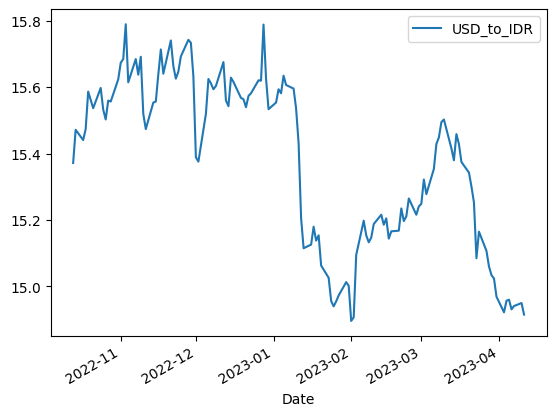

In [341]:
df.plot()

So that the graph that we make looks more informative, we need to give the graph a title, namely the title on the x-axis and y-axis.

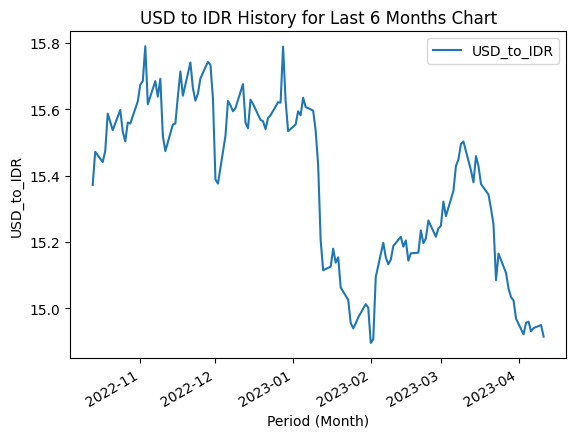

In [342]:
df.plot(
    title = 'USD to IDR History for Last 6 Months Chart',
    xlabel = 'Period (Month)',
    ylabel = 'USD_to_IDR'
);

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Based on the chart above, it can be seen that the USD to IDR (Indonesian currency) exchange rate in the last six months, namely November 2022 to April 2023, was unstable. In addition, in the last 6 months, the Indonesian Rupiah has never been worth more than the US Dollar. The highest US Dollar to IDR exchange rates occurred in November 2022, namely 1 USD almost reaching 15,800 rupiah. Meanwhile, the lowest US Dollar to IDR exchange rates occurred in February 2023 where 1 US Dollar is equivalent to 14,800 rupiahs. When compared between 2023 and 2022, the USD to IDR rated exchange in 2023 has greatly decreased compared to 2022.

Based on the chart it can also be concluded that the USD currency is experiencing currency depreciation. A variety of economic factors can contribute to depreciating the U.S. dollars. These include monetary policy, rising prices or inflation, demand for currency, economic growth, and export prices.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.